In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn.classifiers.fc_net_split3_2 import *
from nn.data_utils import get_CIFAR10_data
from nn.data_utils_mnist import *
from nn.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from nn.solver import Solver
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
data = get_MNIST_data(test_trinary=0,train_trinary=0,val_trinary=0,noise_amplitude=0.0,no_of_levels=5)
for k, v in data.iteritems():
  print '%s: ' % k, v.shape



/home/burc/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(60000,)
0.0
255.0
(50000, 28, 28)
0.0
255.0
X_val:  (10000, 28, 28)
X_train:  (50000, 28, 28)
X_test:  (10000, 28, 28)
y_val:  (10000,)
y_train:  (50000,)
y_test:  (10000,)


In [15]:
X=data['X_train']

In [16]:
print X.shape

(50000, 28, 28)


lr=0.009413, std=0.010422, regu=0.009176 train accuracy is : 0.977000 val acc:  0.971200
 no decay lr=0.009413, std=0.010422,regu=0.009176 train accuracy is : 0.962000 val acc:  0.955100
lr=0.003500, std=0.003270, regu=0.004555 train accuracy is : 0.987000 val acc:  0.972500
 no decay lr=0.003500, std=0.003270,regu=0.004555 train accuracy is : 0.963000 val acc:  0.972200
lr=0.006595, std=0.016308, regu=0.000108 train accuracy is : 0.971000 val acc:  0.967600
 no decay lr=0.006595, std=0.016308,regu=0.000108 train accuracy is : 0.960000 val acc:  0.959500
lr=0.000312, std=0.095924, regu=0.000176 train accuracy is : 0.921000 val acc:  0.907400
 no decay lr=0.000312, std=0.095924,regu=0.000176 train accuracy is : 0.961000 val acc:  0.936700
lr=0.000333, std=0.065285, regu=0.011429 train accuracy is : 0.923000 val acc:  0.926200
 no decay lr=0.000333, std=0.065285,regu=0.011429 train accuracy is : 0.961000 val acc:  0.950700
lr=0.000428, std=0.007773, regu=0.001555 train accuracy is : 0.90

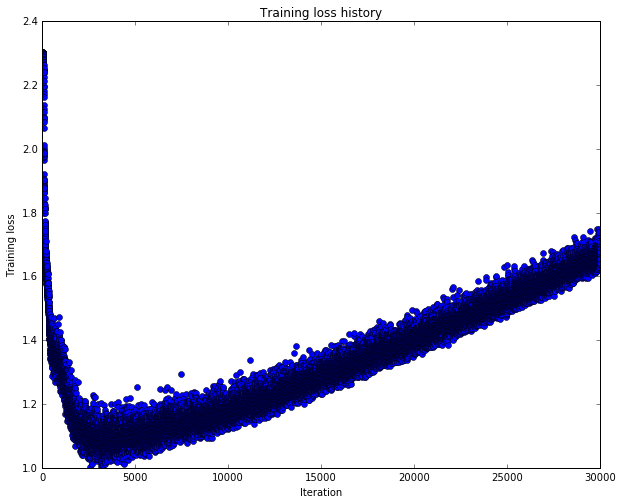

In [5]:
##for nonsplitted 784-512: lr=0.001924, std=0.006602, regu=0.000000 train accuracy is : 0.981000 val acc:  0.974500
##no decay lr=0.000714, std=0.007321,regu=0.000000 train accuracy is : 0.984000 val acc:  0.977100
for i in range(100):
    #learning_rate = 0.000830 #10**np.random.uniform(-4,-3)
    #weight_scale = 0.003849 #10**np.random.uniform(-3,-1)
    #regu = 0.00168276907439#10**np.random.uniform(-3,-1)
    regu=10**np.random.uniform(-4,-1)
    #regu=0
    learning_rate = 10**np.random.uniform(-4,-2)
    weight_scale = 10**np.random.uniform(-3,-1)
    
    #regu =0.00329329787291
    #print regu
    #learning_rate=0.0005
    #weight_scale=0.027
    #learning_rate = 0.001 #10**np.random.uniform(-5,-1)
    #weight_scale = 0.02 #10**np.random.uniform(-3,0)
    # no decay lr=0.000292, std=0.004709, train accuracy is : 0.999000 val acc:  0.970500
#0.14912609128
#0.00669438412009
#0.00168276907439
# no decay lr=0.000830, std=0.003849, train accuracy is : 0.994000 val acc:  0.967100
# no decay lr=0.000508, std=0.027556, train accuracy is : 1.000000 val acc:  0.971500

    model = ThreeLayerNet(input_dim=28*28, ##hidden_dim=256,
              weight_scale=weight_scale, reg=regu, activation=3, scores_activation=3)
    solver = Solver(model,data,
                print_every=10, num_epochs=60, batch_size=100,
                update_rule='sgd_momentum',lr_decay=0.95,verbose = False,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
    
    solver.train()

    print 'lr=%f, std=%f, regu=%f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale, regu, solver.train_acc_history[-1], solver.val_acc_history[-1])
 

    model = ThreeLayerNet(input_dim=28*28,  ##hidden_dim=256,
              weight_scale=weight_scale, reg=regu,activation=3, scores_activation=3)
    solver = Solver(model,data,
                print_every=4000, num_epochs=60, batch_size=100, 
                update_rule='sgd_momentum',lr_decay=1.0,verbose =False, #lr_decay=0.0,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
    solver.train()
    print ' no decay lr=%f, std=%f,regu=%f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale,regu, solver.train_acc_history[-1], solver.val_acc_history[-1])
 


#solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')

In [3]:
y= np.array(range(0,28*28*10))
print y.shape

print y[0], y[1231]
y2= np.reshape(y,(10,28,28))
print y2.shape
print y2[0,0,0], y2[0,0,1], y2[1,0,0], y2[0,1,0]

y3 = np.reshape(y2, (y2.shape[0],-1))
print y3.shape


(7840,)
0 1231
(10, 28, 28)
0 1 784 28
(10, 784)


In [48]:
##no decay lr=0.000986, std=0.004749,regu=0.000312 train accuracy is : 0.989000 val acc:  0.979100
regu=0.000312
learning_rate = 0.000986
weight_scale = 0.004749


model = TwoLayerNet(hidden_dim=256,input_dim=28*28,
weight_scale=weight_scale, reg=regu,activation=3, scores_activation=3)
solver = Solver(model,data,
                print_every=4000, num_epochs=60, batch_size=100,
                update_rule='sgd_momentum',lr_decay=1.0,verbose =False, #lr_decay=0.0,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
solver.train()
print ' no decay lr=%f, std=%f,regu=%f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale,regu, solver.train_acc_history[-1], solver.val_acc_history[-1])
 

 no decay lr=0.000986, std=0.004749,regu=0.000312 train accuracy is : 0.984000 val acc:  0.976300


In [98]:
y_test_pred = np.argmax(model.loss(data['X_test'],noise=0,test=1), axis=1)
y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()
y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1), axis=1)
print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()

y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=32), axis=1)
print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()

Validation set accuracy:  0.9772
Test set accuracy:  0.9742
Noisy test set accuracy:  0.9743
Noisy test set accuracy:  0.9706
